Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv("C:/Users/Hrushikesh/Desktop/Company Material/bigdatamart_Train.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### It is a regression type problem as our target variable 'Item_outlet_sale' contain numerical data. Also we can observe that Item_identifier  and Outlet_identifier taken on the basis of indexing purpose it has nothing to do with our data so we will drop it later

In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### There are so many missing values present in the Item_weight and Outlet_size. Column Iteam_weight contain numerical data so we use mean and median to deal with null values And Column Outlet_size contain categorical_data so we use mode to deal with null values 

<AxesSubplot:>

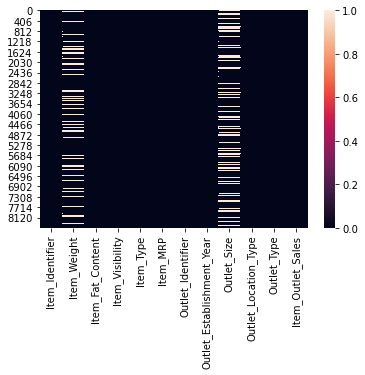

In [8]:
sns.heatmap(train_data.isna())

#### Here we can clearly see that the presence of white lines indicates the missing values in the columns.

In [9]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### This gives the statistical information about the dataset. 
we can observe that count value of Item-weight is 7060 which means their are missing values present in the dataset.

We also observe that there are lots of outliers and skewness present in the data as column Item_MRP and Outlet_Establishment_year has a huge outliers from max 266 to 2009 we have to remove it before building the model


# Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

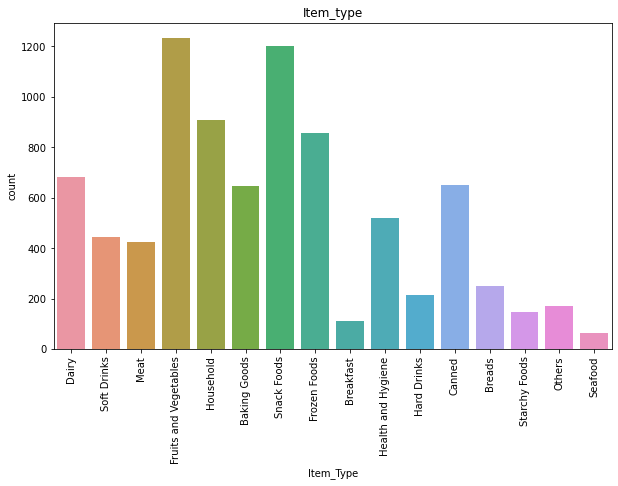

In [10]:
#visualizing the count of Item_type
plt.figure(figsize=(10,6))
sns.countplot(train_data['Item_Type'])
plt.title('Item_type')
plt.xticks(rotation=90)

From the above graph we can observe that "Fruits and Vegetable", "Snack Foods", "Frozen Food" and "Households" have high counts most of the people comes to buy these products  

Text(0.5, 1.0, 'Outlet_Size')

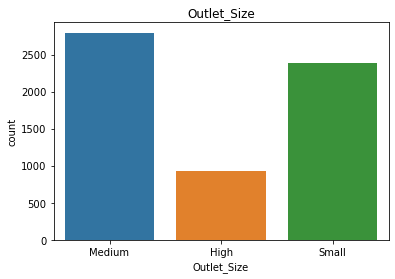

In [11]:
sns.countplot(train_data['Outlet_Size'])
plt.title('Outlet_Size')

Here we have three sizes high, medium, and small. The Count of medium size outlets are more followed by small outlets. High outlets has very less number of counts

Text(0.5, 1.0, 'Outlet_Location')

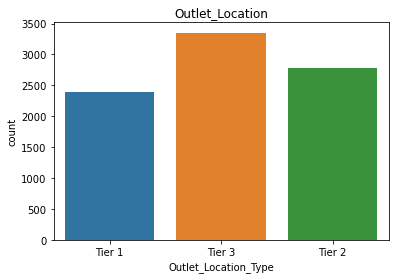

In [12]:
sns.countplot(train_data['Outlet_Location_Type'])
plt.title('Outlet_Location')

#### Observations

1) There are three types of cities namely tier 1, tier 2 and tier 3

2) Tier 3 contains high number of stores

3) Tier 1 and tier 2 contains less number of stores 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

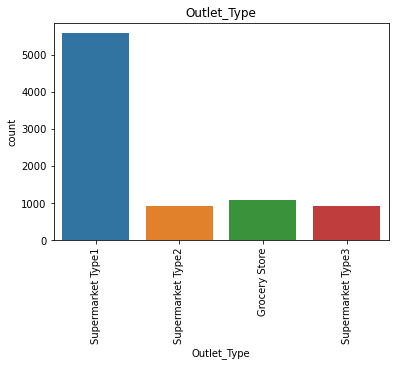

In [13]:
sns.countplot(train_data['Outlet_Type'])
plt.title('Outlet_Type')
plt.xticks(rotation=90)

#### Observations
1) There are 4 types of stores present Type1, Type2, Grocery Store and Type 3

2) Supermarket Type 1 has high value

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

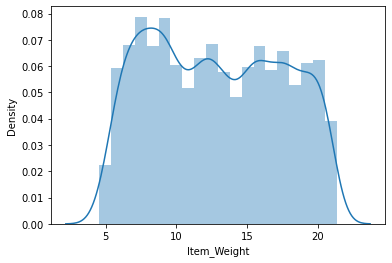

In [14]:
sns.distplot(train_data['Item_Weight'])

The Data is almost normally distributed and there is no skewness

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

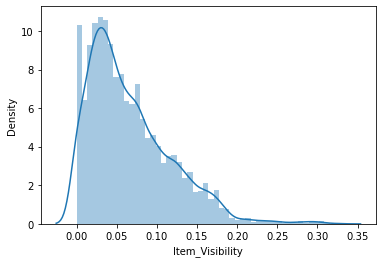

In [15]:
sns.distplot(train_data['Item_Visibility'])

The data here is not normally distributed and also left skewed

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

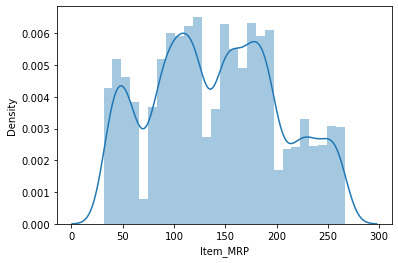

In [16]:
sns.distplot(train_data['Item_MRP'])

The data is not normally distributed and also there is no skewness

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

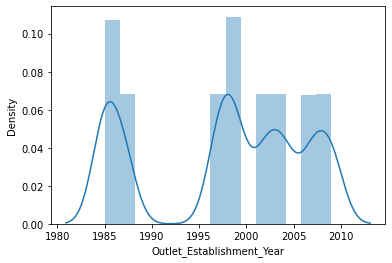

In [17]:
sns.distplot(train_data['Outlet_Establishment_Year'])

The data is not normally distributed and has no skewness

# Correlation

In [18]:
corr = train_data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

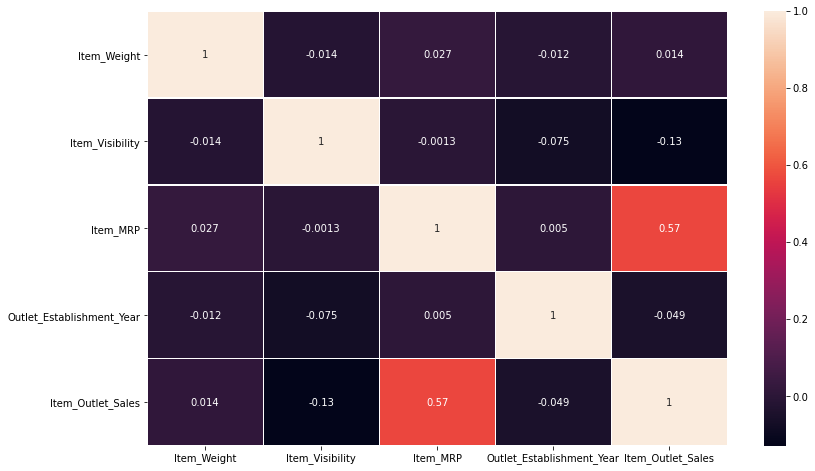

In [19]:
#visualizing the correlation matrix using heatmap
plt.figure(figsize=(13,8))
sns.heatmap(train_data.corr(),linewidth=.1, annot= True)


#### The Heatmap contains both positive and negative corelation

1) Item_MRP is highly positively corelated with target variable Iteam_Outlet_Sales

2) Item_Weight has very low positive correlation with target variable

3) Item_Visibility and Item_Establishment_year have very low negative correlation with target variable


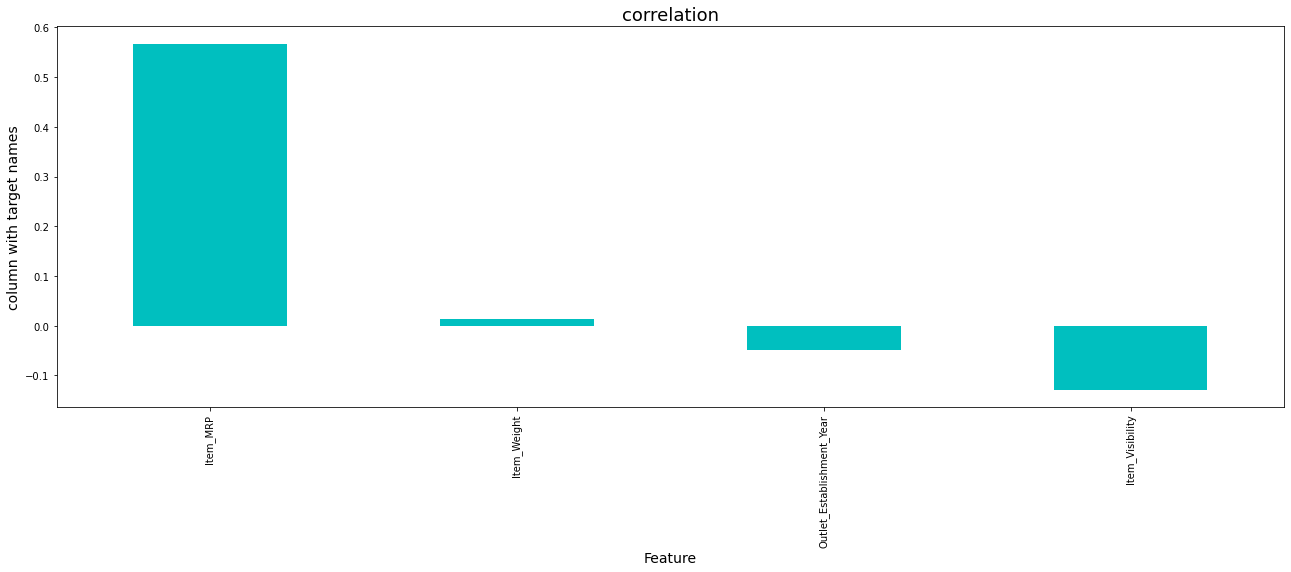

In [20]:
#visualizing corelation between features and labels using barplot
plt.figure(figsize=(22,7))
train_data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


#### Observation
1) Item_MRP is highly Correlated with target variable 

2) Item_Weight is less Correlated with target variable

# Data Cleaning

In [21]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_weight and Outlet_size have missing values

Since Item_Weight has a numerical data and has no outliers then we can fill the null values by using mean method.

In [22]:
train_data['Item_Weight'].mean()

12.857645184136183

In [23]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

Since Outlet_size has a Categorical data and mode of outlet_size is medium since it has high value count, so we fill the null values using mode method

In [24]:
train_data["Outlet_Size"] = train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode()[0])

In [25]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So we have filled the missing values present in the columns. Now our data is cleaned

# Identitying Outliers

<AxesSubplot:>

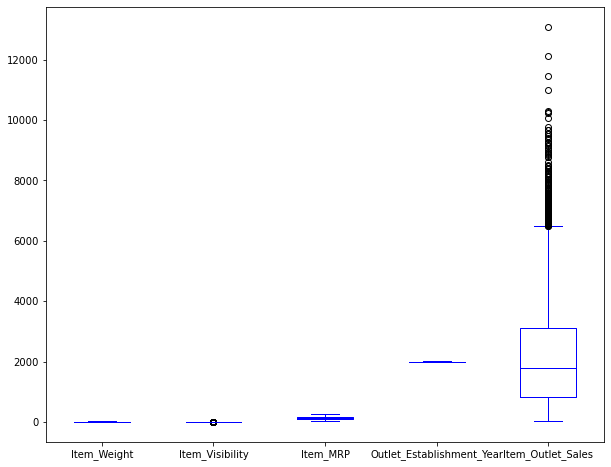

In [26]:
train_data.plot(kind='box',figsize=(10,8), color = 'b', vert = True  )

The columns Item_visibility and Item_Outlet_sales has outliers,item_outlet_sales is our target variable so i am not removing outliers from that


<AxesSubplot:xlabel='Item_Visibility'>

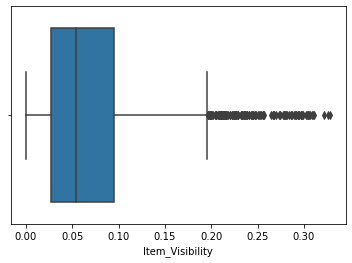

In [27]:
sns.boxplot(train_data['Item_Visibility'])

# Removing Outliers

In [28]:
v = train_data[['Item_Visibility']]

In [29]:
from scipy.stats import zscore

In [30]:
z =np.abs(zscore(v))
new_data = train_data[(z<3).all(axis=1)]
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
train_data.shape

(8523, 12)

In [32]:
new_data.shape

(8428, 12)

In [33]:
data_loss = (8523-8428)/8523*100
data_loss

1.1146309984747156

Here we are not loosing much data so I am removing outliers

In [34]:
Q1 = v.quantile(0.25)

Q3 = v.quantile(0.75)

IQR = Q3-Q1

df1 = train_data[~((train_data < (Q1 -1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
train_data.shape

(8523, 12)

In [36]:
df1.shape

(8379, 12)

In [37]:
data_loss = (8523-8379)/8523*100
data_loss

1.689545934530095

Here also I am not losing more data. But compare to Zscore, the loss of data in IQR is bit more, so let me consider Zscore method.

# Skewness

In [38]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [39]:
f = ["Item_Visibility"]
new_data[f]= scaler.fit_transform(new_data[f].values)
new_data[f].head()

,Item_Visibility
0,-1.142270
1,-1.032913
2,-1.117874
3,-1.734798
4,-1.734798


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

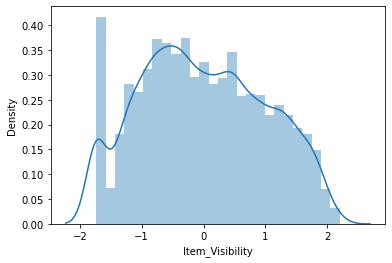

In [40]:
# After removing let's check how the data has been distributed in the column
sns.distplot(new_data["Item_Visibility"])

The data is almost normally distributed and skewness is also removed

In [41]:
new_data.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

The skewness is removed

# Encoding The Data Using Label Encoding

In [42]:
#checking for the categorical variables
col = []
for x in train_data.dtypes.index:
    if train_data.dtypes[x]=='object':
        col.append(x)
print(col)
        
    

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [43]:
cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data[cols] = new_data[cols].apply(le.fit_transform)

In [45]:
new_data[cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


In [46]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,-1.142270,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,-1.032913,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,-1.117874,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,-1.734798,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,-1.734798,9,53.8614,1,1987,0,2,1,994.7052


Dataset after cleaning and encoding

# Separating the independent and target variables into x and y

In [47]:
x = new_data.drop("Item_Outlet_Sales", axis=1)
y = new_data["Item_Outlet_Sales"]

In [48]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.25,0.150584,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,0.50,0.178376,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.25,0.156784,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8423,0.237484,0.137541,0.25,0.449370,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333
8424,0.575738,0.227746,0.50,0.386845,0.000000,0.326263,0.777778,0.708333,0.5,0.5,0.333333
8425,0.870988,0.359929,0.25,0.304215,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333
8426,0.437099,0.158083,0.50,0.831823,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [50]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    pred = lm.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.5379963465514582 on Random_state  0


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [52]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [53]:
# Checking r2score for Linear Regression
lm = LinearRegression()
lm.fit(x_train,y_train)

# prediction
predlm=lm.predict(x_test)
print('R2_score:',r2_score(y_test,predlm))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predlm))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predlm))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predlm)))

R2_score: 0.5062314300504762
MAE: 902.6540026281008
MSE: 1473615.6998343056
RMSE: 1213.925739011372


The R2 score value for Linear Regression model is 50.62%

# RandomForest Regressor

In [54]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
predRF=RF.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))

R2_Score: 0.5564783203367438
MAE: 803.1785024816132
MSE: 1323657.5799781445
RMSE: 1150.5031855575821


The R2 score for Random Forest Regressor is 55.64%

# AdaBoost Regressor

In [56]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)


AdaBoostRegressor()

In [57]:
predad=ad.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predad))
print('MAE:',metrics.mean_absolute_error(y_test, predad))
print('MSE:',metrics.mean_squared_error(y_test, predad))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predad)))

R2_Score: 0.42378425837926437
MAE: 1065.21268252416
MSE: 1719673.1728606913
RMSE: 1311.3630972620404


The R2 score for AdaBoost regressor model is 42%.

# KNN Regressor

In [58]:
knn = KNN()
knn.fit(x_train,y_train)


KNeighborsRegressor()

In [59]:
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.5328462453564857
MAE: 836.2578579992093
MSE: 1394185.7561926206
RMSE: 1180.7564338984653


The R2 score for KNN Regressor model is 53%.

# Gradient Boosting

In [60]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)


GradientBoostingRegressor()

In [61]:
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.590672055005711
MAE: 771.5043805410595
MSE: 1221608.9132326904
RMSE: 1105.2641825521582


The R2 score for Gradient Booster model is 59%

# Cross Validation

In [62]:
print('Linear regression:-',cross_val_score(lm,x,y,cv=5).mean())

Linear regression:- 0.5044873137603315


In [63]:
print('Random Forest Regressor:-',cross_val_score(RF,x,y,cv=5).mean())

Random Forest Regressor:- 0.5457330610202018


In [64]:
print('AdaBoost Regressor:-',cross_val_score(ad,x,y,cv=5).mean())

AdaBoost Regressor:- 0.44589889377563346


In [65]:
print('KNN Regressor:-',cross_val_score(knn,x,y,cv=5).mean())

KNN Regressor:- 0.4969014409000042


In [66]:
print('Gradient Boosting Regressor:-',cross_val_score(GB,x,y,cv=5).mean())

Gradient Boosting Regressor:- 0.5875591860059262


From the above observation, the difference between R2 score and the cross validation score we conclude that GradientBoosting Regressor is our best fitting model

# Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameters = {'n_estimators':[10,100,200],
             'criterion':['mse', 'mae'],
             'max_features':["auto","sqrt","log2"]}

In [69]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 200]})

In [71]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 100}

In [72]:
Final_mod = GradientBoostingRegressor(n_estimators=100, criterion="mse", max_features ="auto", random_state=115)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 1150.5031855575821
R2_Score: 59.057045097364


After tuning R2 score of our model has been increased and has 59.05%.

# Saving the Model

In [73]:
import joblib
joblib.dump(Final_mod,"Big_Data_Mart_Sales.pkl")

['Big_Data_Mart_Sales.pkl']

In [74]:
test_data = pd.read_csv("C:/Users/Hrushikesh/Desktop/Company Material/bigdatamart_Test.csv")

In [75]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


This dataset has no target variables and we need to use the past data to get the sales prediction

In [76]:
test_data.shape

(5681, 11)

In [78]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [80]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are missing values in Item_weight and Outlet_size

<AxesSubplot:>

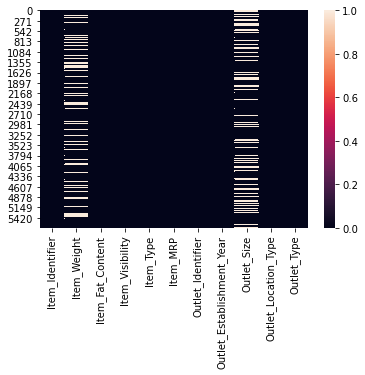

In [81]:
sns.heatmap(test_data.isna())

Here we can clearly see that the presence of white lines indicates the missing values in the columns.

In [84]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


This gives some statistical information about our test dataset. The count of item weight is 4705 all the other columns have same counts, which means it has null values.

In [86]:
print(test_data["Item_Fat_Content"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.

In [87]:
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('LF','Low Fat')
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('low fat','Low Fat')
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('reg','Regular')

In [89]:
print(test_data["Item_Fat_Content"].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


# Treating Missing values using imputation techniques

In [91]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The feature Item_Weight is numerical and we will use mean methhod to fill the null values. The feature Outlet_Size is a categorical data and the mode of Outlet_Size is Medium so will use mode method to treat the null values.

In [94]:
test_data["Item_Weight"] = test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean())

In [93]:
test_data["Outlet_Size"] = test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode()[0])

In [95]:
# Let's check the missing value after filling it up
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

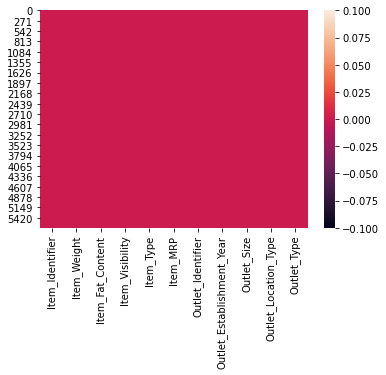

In [96]:
sns.heatmap(test_data.isnull())


<AxesSubplot:>

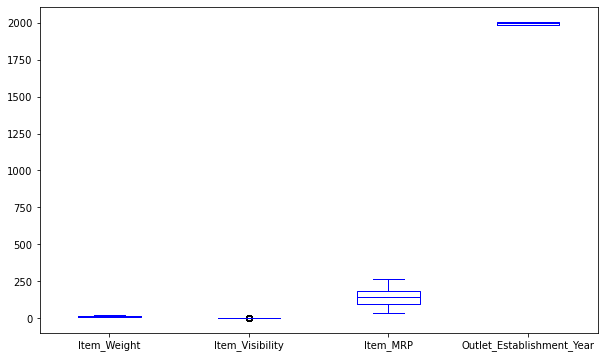

In [97]:
test_data.plot(kind="box", figsize=(10,6), color="b",vert=True)

The column Item_Visibility has outliers, let's remove it.

In [99]:
from scipy.stats import zscore
z=np.abs(zscore(test_data[["Item_Visibility"]]))
new_dff=test_data[(z<3).all(axis=1)]
new_dff

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [101]:
test_data.shape

(5681, 11)

In [102]:
new_dff.shape

(5600, 11)

In [103]:
# Checking the skewness
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

We can observe the skewness in Item_Visibility. So let's remove it.

In [104]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [105]:
new_dff[['Item_Visibility']] = scaler.fit_transform(new_dff[['Item_Visibility']].values)

In [106]:
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.105676
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

In [108]:
cat_cols=[]
for x in test_data.dtypes.index:
    if test_data.dtypes[x]=='object':
        cat_cols.append(x)
print(cat_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [109]:
from sklearn.preprocessing import LabelEncoder
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
LE=LabelEncoder()
new_dff[columns]= new_dff[columns].apply(LE.fit_transform)

In [110]:
new_dff[columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,0,13,9,1,0,1
1,1066,1,4,2,1,1,1
2,1405,0,11,0,1,2,0
3,809,0,13,2,1,1,1
4,1183,1,4,5,1,2,3
